In [56]:
import numpy as np
from skimage import exposure, io, color, img_as_float
import matplotlib.pyplot as plt
np.random.seed(1000)

[[0.65358959 0.11500694 0.95028286]
 [0.4821914  0.87247454 0.21233268]
 [0.04070962 0.39719446 0.2331322 ]]


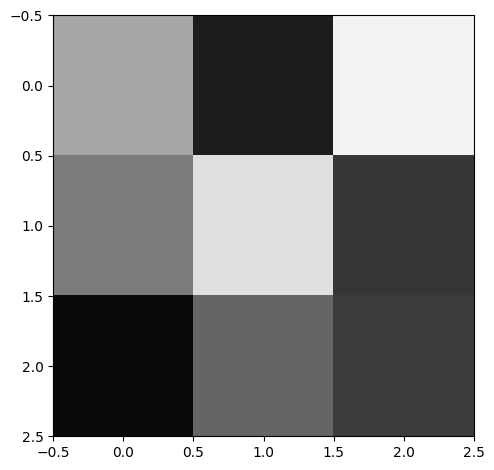

In [57]:
I = np.random.rand(3, 3)
print(I)
io.imshow(I) # showing the image

[[0.85358959 0.31500694 1.15028286]
 [0.6821914  1.07247454 0.41233268]
 [0.24070962 0.59719446 0.4331322 ]]


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


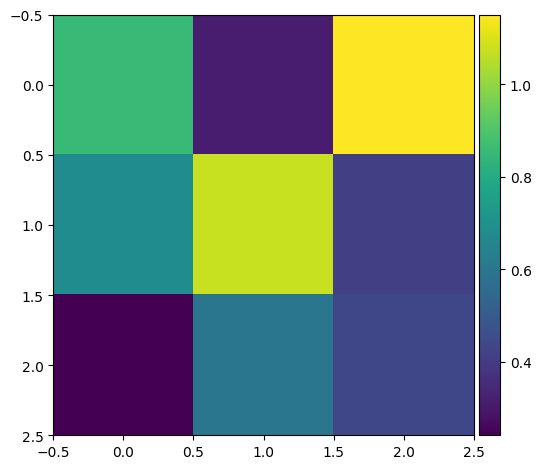

In [58]:
#doing addition operation
I_add = I + 0.2 # to increase brightness # the reason behind color panel shift is that the range increases after adding 0.3

print(I_add)
io.imshow(I_add)

# Normallly adding might give gray scale but here color, why?
# In matpotlib 0,1 black and white, so when added and increased number the value is upper than 1, it does not understand 0,1 mapping, it goes towards 0,2 which changes colorI_add

[[1.         0.51500694 1.        ]
 [0.8821914  1.         0.61233268]
 [0.44070962 0.79719446 0.6331322 ]]


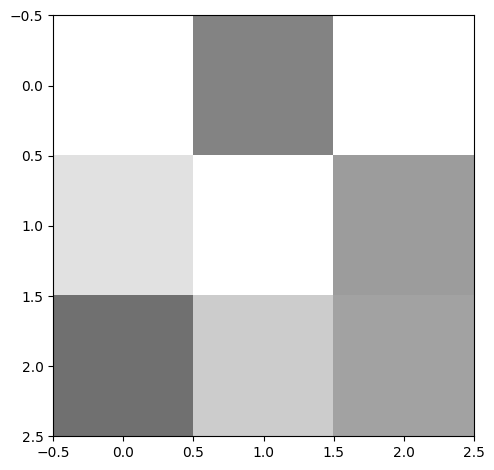

In [59]:
# I_add[I_add>1] = 1 # where I_add greater than 1, set 1 #[ can use this or np]
# I_add = np.clip(I_add, 0, 1)
I_add = np.clip(I_add+0.2, 0, 1)

print(I_add)
io.imshow(I_add)

[[0.45358959 0.         0.75028286]
 [0.2821914  0.67247454 0.01233268]
 [0.         0.19719446 0.0331322 ]]


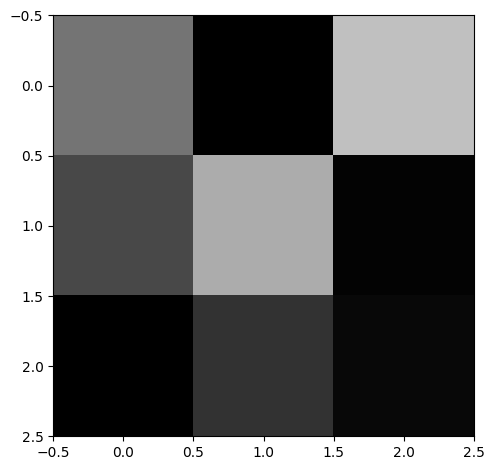

In [60]:
I_sub = np.clip(I-0.2, 0, 1)

print(I_sub)
io.imshow(I_sub)

In [61]:
# for contrast change multilpication or division


Text(0.5, 1.0, 'sub by 0.2')

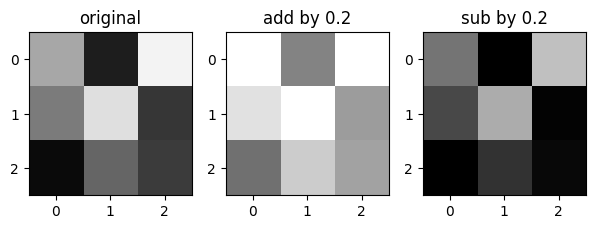

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(1,5,1)  # row, column, position
io.imshow(I)
plt.title("original")


plt.subplot(1,5,2)
io.imshow(I_add)
plt.title("add by 0.2")


plt.subplot(1,5,3)
io.imshow(I_sub)
plt.title("sub by 0.2")

# plt.subplot(1,5,4)
# io.imshow(I_mul)
# plt.title("mul by 0.3")

# plt.subplot(1,5,5)
# io.imshow(I_div)
# plt.title("div by 0.3")
# plt.show()

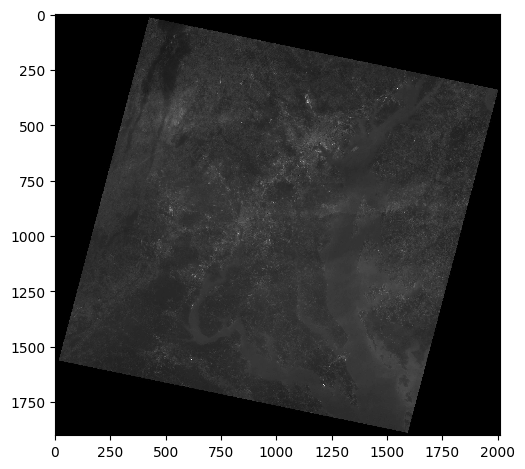

In [63]:
# I_sat = io.imread("/content/landsat_down.jpeg") # we want our image to be in 0, 1 so we do float
I_sat = img_as_float(io.imread("/content/landsat_down.jpeg")) # equivalant ot dividing with 255
io.imshow(I_sat)

In [64]:
print(f"Max Value = {np.max(I_sat)}")
print(f"Min Value = { np.min(I_sat)}")

Max Value = 1.0
Min Value = 0.0


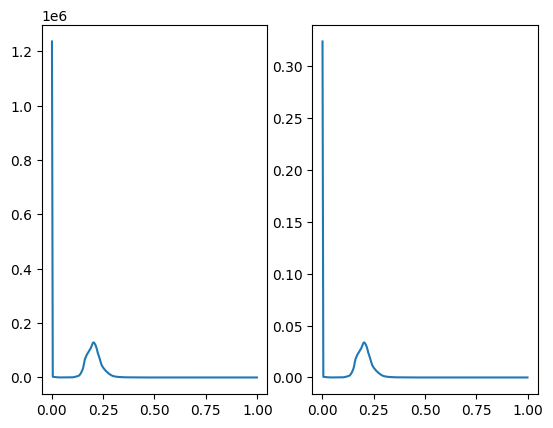

In [65]:
# y, x = exposure.histogram(variable, intensity level, for y axis, if true then 1200/total pixel)
hist_orig, bins_hist = exposure.histogram(I_sat, nbins = 256, normalize = True)
hist_test, bins_test = exposure.histogram(I_sat, nbins = 256, normalize = False)

plt.subplot(1,2,1)  # row, column, position
b_with_true = plt.plot(bins_test, hist_test)
print(b_with_true)

plt.subplot(1,2,2)  # row, column, position
a_w_false = plt.plot(bins_hist, hist_orig)
print(a_w_false)

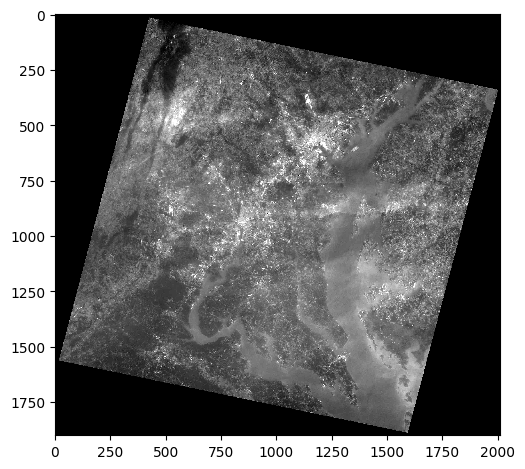

In [66]:
I_sat_stretched = np.clip(4*(I_sat - 0.1),0,1)
io.imshow(I_sat_stretched)

Text(0.5, 1.0, 'after streching')

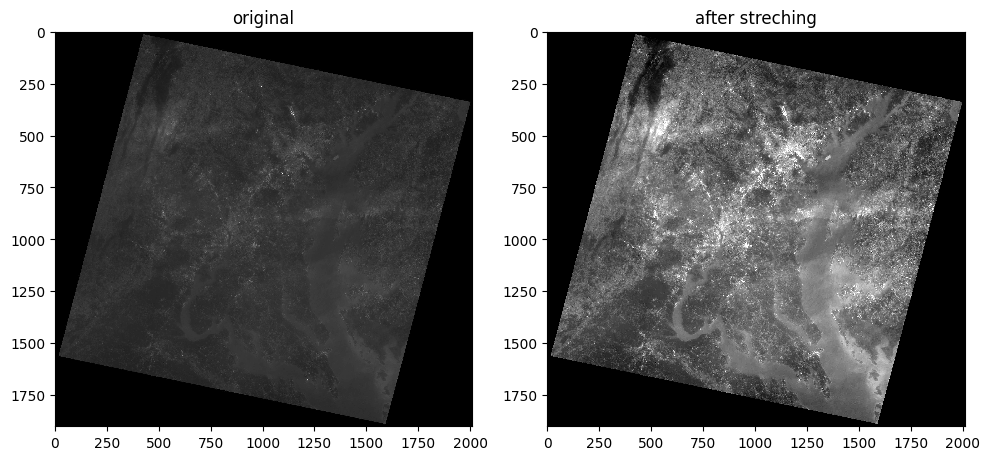

In [69]:
hist_stretched, bins_hist=exposure.histogram(I_sat_stretched, nbins=256, normalize=False)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
io.imshow(I_sat)
plt.title("original")
plt.subplot(1,2,2)
io.imshow(I_sat_stretched)
plt.title("after streching")

Text(0.5, 1.0, 'After Contrast Streching')

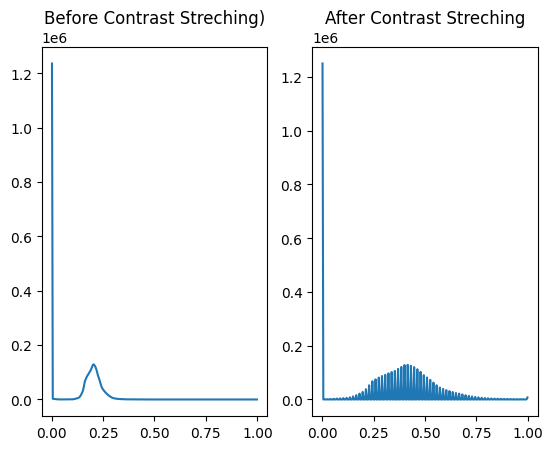

In [71]:
hist, bins_hist = exposure.histogram(I_sat, nbins = 256, normalize = False) #hist is the y axis values , basically quantization
hist_stretched, bins_hist = exposure.histogram(I_sat_stretched, nbins = 256, normalize = False)

plt.figure()
plt.subplot(1,2,1)
plt.plot(bins_hist,hist)
plt.title("Before Contrast Streching)")

plt.subplot(1,2,2)
plt.plot(bins_hist,hist_stretched)
plt.title("After Contrast Streching")

# plt.plot(bins_hist,hist)

In [73]:
print(hist[0])
print(hist_stretched[0])

1236557
1250173


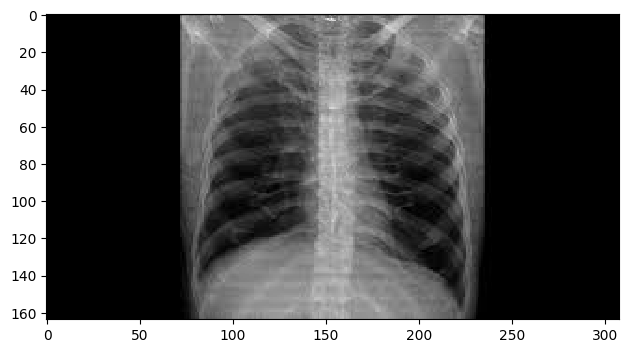

In [80]:
I_xray = img_as_float(color.rgb2gray(io.imread("/content/XRAY.jpeg"))) # equivalant ot dividing with 255
io.imshow(I_xray)



# Power law transformation

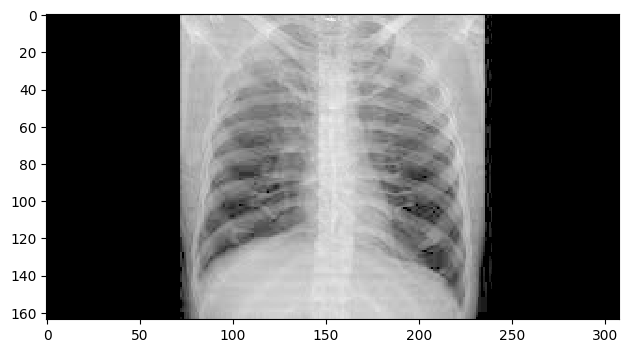

In [81]:
# Power law transformation
gamma = 0.4 # more less, x intensity range smaller for y intensity
I_xray_enhanced = np.clip(1*  (I_xray ** gamma), 0, 1) # s = c*r^(gamma)
io.imshow(I_xray_enhanced)

In [83]:
# @title Gray level Slicing Increasing the Intensity in region of interest
#

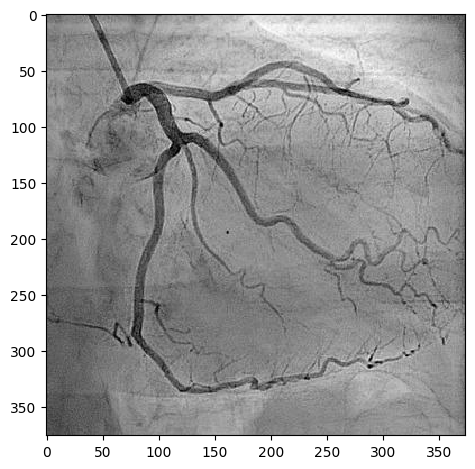

In [84]:
I_ang = img_as_float(io.imread("/content/angiogram_bw.jpeg"))
io.imshow(I_ang)

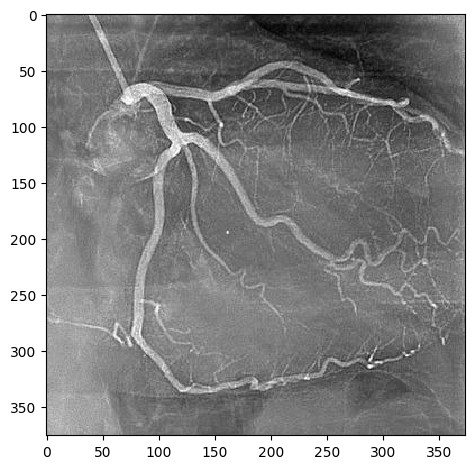

In [91]:
# take negative to make white
negative = 1-I_ang
io.imshow(negative)

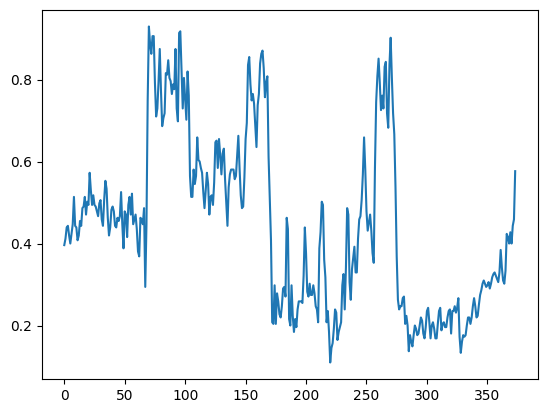

In [90]:
# intensity range highher from background
plt.plot(negative[70,:])

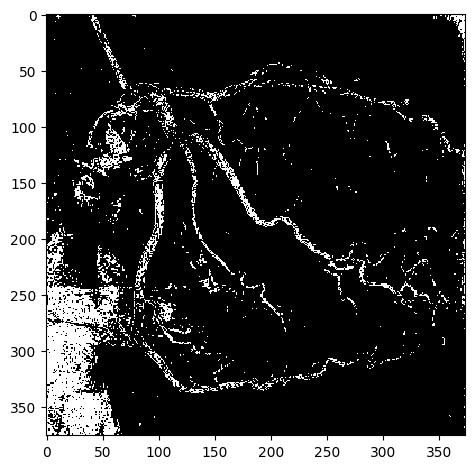

In [96]:
# making background darker adn whites focused
negative = 1-I_ang

lower_threshold = 0.6
higher_threshold = 0.7

negative[negative < lower_threshold] = 0
negative[negative > higher_threshold] = 0

negative[(negative >= lower_threshold) & (negative <= higher_threshold)] = 1

io.imshow(negative)

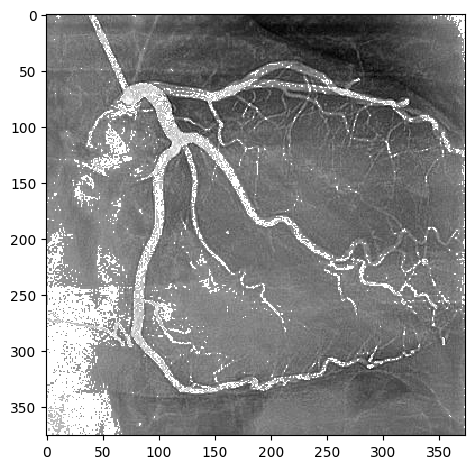

In [97]:
# to hightlight only negative[(negative >= lower_threshold) & (negative <= higher_threshold)] = 1 and not the background\

negative = 1-I_ang
lower_threshold = 0.6
higher_threshold = 0.7


negative[(negative >= lower_threshold) & (negative <= higher_threshold)] = 1

io.imshow(negative)